<a href="https://colab.research.google.com/github/Az140304/MachineLearning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [12]:
%pip install tensorflow pandas matplotlib seaborn numpy scipy kaggle

Note: you may need to restart the kernel to use updated packages.


In [6]:
!kaggle datasets download -d wangziang/waste-pictures -p data --unzip

^C


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_dir = 'data'
os.listdir(data_dir)

['test', 'train', 'waste-pictures.zip']

In [3]:
test_dir = "data/test/"
train_dir = "data/train/"

# Exploratory Dataset

In [22]:
from PIL import Image

def verify_image(filepath):
    """
    Verifikasi apakah file gambar dapat dibuka tanpa error.
    """
    try:
        with Image.open(filepath) as img:
            img.verify()  # Periksa gambar
        return True
    except (IOError, SyntaxError):
        print(f"File rusak atau tidak didukung: {filepath}")
        return False

def clean_directory(directory):
    """
    Hapus gambar rusak dari direktori.
    """
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            if not verify_image(filepath):
                os.remove(filepath)  # Hapus gambar rusak

# Gunakan fungsi untuk membersihkan direktori dataset
clean_directory(train_dir)
clean_directory(test_dir)

File rusak atau tidak didukung: data/train/battery\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòÆ┬╡Γò⌐ΓòíΓò¼╧âΓòæΓö╝Γòí╧äΓöéΓò¬ΓòÉΓò¥Γò₧┬╝\list2.data
File rusak atau tidak didukung: data/train/battery\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_Γòí╧äΓöéΓò¬ΓòÉΓò¥Γò₧┬╝\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòÑΓò½Γöö┬íΓòúΓûÉ\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòÑΓò½Γöö┬íΓòúΓûÉΓò₧├¡Γò¢Γò₧\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓööΓòóΓöñ┬░ΓòÑΓò½Γöö┬íΓòúΓûÉΓò£┬╜Γò¢Γü┐Γò₧├¡Γò¢Γò₧\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓööΓòóΓöñ┬░ΓòÑΓò½Γöö┬íΓòúΓûÉΓò₧├¡Γò¢Γò₧\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓûæΓöÿΓò⌐Γö¼ΓòÑΓò½Γöö┬íΓòúΓûÉ\list2.data
File rusak atau tidak didukung: data/train/cans\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓûæΓöÿΓò⌐Γö¼ΓöÉΓòöΓööΓòôΓ

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòñΓööΓòª├│\list2.data
File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòñΓööΓòª├│ΓòÆΓòÆΓò₧┬╝\list2.data
File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòñΓööΓòª├│ΓòÆ┬╡Γò⌐ΓòíΓòÆΓòÆΓò₧┬╝\list2.data
File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòóΓêÖΓòÉ┬╗ΓòñΓööΓòª├│\list2.data
File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòûΓòºΓò¢ΓòöΓòñΓööΓòª├│\list2.data
File rusak atau tidak didukung: data/train/toothbrush\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓööΓö£ΓòñΓööΓòª├│\list2.data
File rusak atau tidak didukung: data/train/toothpastetube\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòñΓööΓòò╬▒Γò₧├▒\list2.data
File rusak atau tidak didukung: data/train/toothpastetube\_taskdata\ΓûæΓöÿΓòóΓòÜΓòÉΓò¥Γò₧┬╝_ΓòñΓööΓòò╬▒Γò₧├▒(1)\list2.data
File rusak atau tidak didukun

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
data_flow = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 17871 images belonging to 34 classes.


In [25]:
class_labels = list(data_flow.class_indices.keys())
print("Kategori yang ada:", class_labels)

Kategori yang ada: ['XLight', 'bandaid', 'battery', 'bowlsanddishes', 'bread', 'bulb', 'cans', 'carton', 'chopsticks', 'cigarettebutt', 'diapers', 'facialmask', 'glassbottle', 'leaflet', 'leftovers', 'medicinebottle', 'milkbox', 'nailpolishbottle', 'napkin', 'newspaper', 'nut', 'penholder', 'pesticidebottle', 'plasticbag', 'plasticbottle', 'plasticene', 'rag', 'tabletcapsule', 'thermometer', 'toothbrush', 'toothpastetube', 'toothpick', 'traditionalChinesemedicine', 'watermelonrind']


In [26]:
from collections import Counter

class_counts = Counter()
for label in class_labels:
    class_counts[label] = len(os.listdir(os.path.join(train_dir, label)))

print("Distribusi gambar per kategori:", class_counts)

Distribusi gambar per kategori: Counter({'nailpolishbottle': 986, 'leftovers': 930, 'penholder': 882, 'battery': 840, 'watermelonrind': 810, 'newspaper': 763, 'XLight': 755, 'plasticene': 755, 'plasticbag': 751, 'pesticidebottle': 737, 'bread': 732, 'tabletcapsule': 701, 'thermometer': 700, 'leaflet': 683, 'bulb': 681, 'bowlsanddishes': 610, 'facialmask': 601, 'cans': 596, 'diapers': 567, 'medicinebottle': 526, 'napkin': 442, 'rag': 440, 'glassbottle': 422, 'toothbrush': 362, 'bandaid': 292, 'toothpastetube': 253, 'chopsticks': 195, 'nut': 192, 'plasticbottle': 184, 'carton': 173, 'milkbox': 128, 'toothpick': 98, 'cigarettebutt': 53, 'traditionalChinesemedicine': 35})


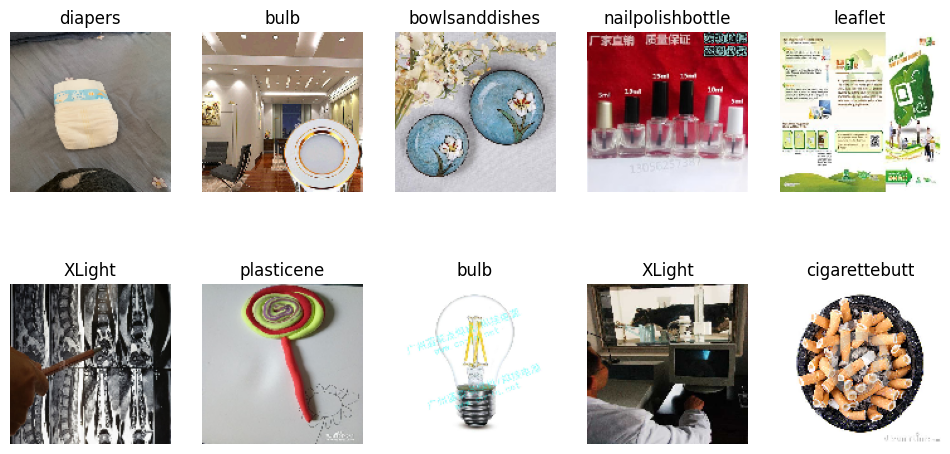

In [27]:
def plot_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Ambil gambar pertama dari batch
        plt.title(class_labels[np.argmax(label[0])])
        plt.axis("off")
    plt.show()

plot_images(data_flow)

In [28]:
img_shape = data_flow.image_shape
print("Dimensi gambar yang digunakan:", img_shape)

Dimensi gambar yang digunakan: (128, 128, 3)


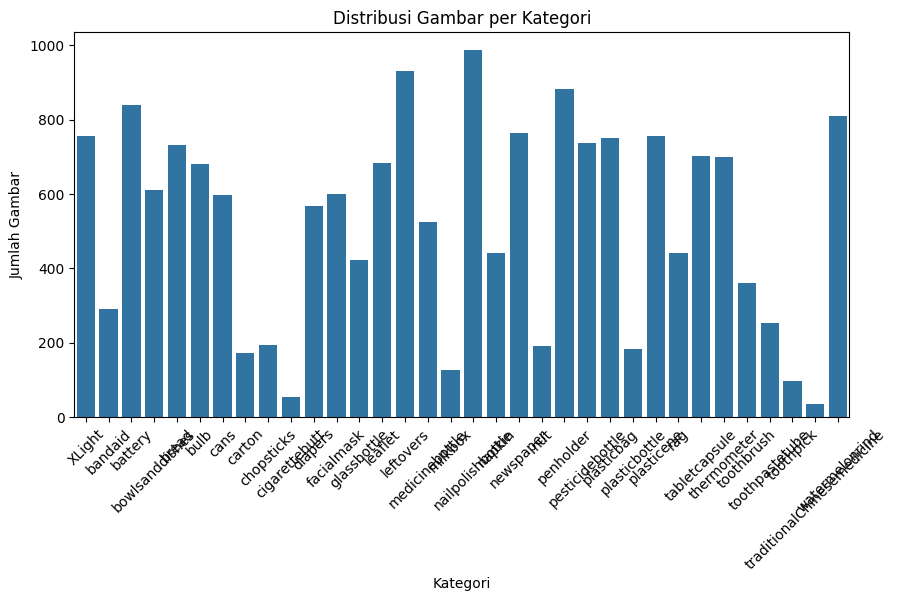

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Distribusi Gambar per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45)
plt.show()

# Preprocessing Data

## Image Data Generator

In [30]:
target_size = (128, 128)
batch_size = 32

# Generator untuk train dan validation set (20% dari data training untuk validation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split 20% untuk validation
)

# Generator untuk test set (tanpa augmentasi, hanya normalisasi)
test_datagen = ImageDataGenerator(rescale=1./255)

## Load Dataset

In [31]:
# Flow untuk training data
train_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Flow untuk validation data
val_flow = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Flow untuk test data
test_flow = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Tidak diacak untuk evaluasi akhir
)

Found 14307 images belonging to 34 classes.
Found 3564 images belonging to 34 classes.
Found 5756 images belonging to 34 classes.


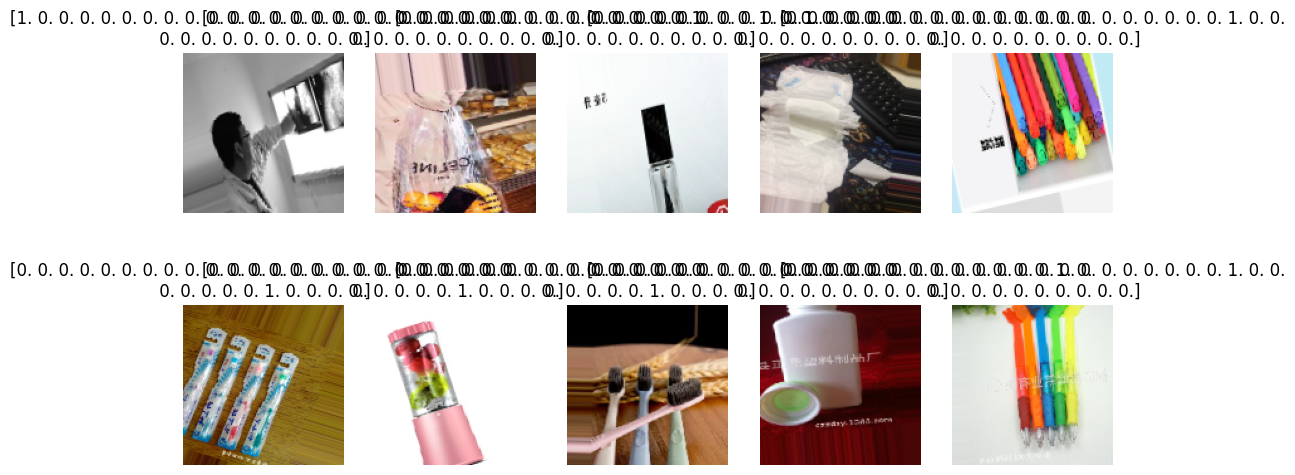

In [32]:
def plot_augmented_images(data_flow, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img, label = next(data_flow)
        plt.subplot(2, 5, i+1)
        plt.imshow(img[0])  # Menampilkan gambar pertama dari batch
        plt.title(label[0])
        plt.axis("off")
    plt.show()

# Visualisasi beberapa gambar dari train_flow
plot_augmented_images(train_flow)

# Build and train CNN model

## Build CNN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_flow.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Transfer learning

In [34]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Bekukan layer awal dari model pretrained

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_flow.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train model

In [35]:
history = model.fit(
    train_flow,
    validation_data=val_flow,
    epochs=20  # Sesuaikan dengan kebutuhan
)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 25/448 ━━━━━━━━━━━━━━━━━━━━ 2:18 327ms/step - accuracy: 0.0665 - loss: 3.9468

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


448/448 ━━━━━━━━━━━━━━━━━━━━ 213s 465ms/step - accuracy: 0.3228 - loss: 2.5765 - val_accuracy: 0.6470 - val_loss: 1.2454
Epoch 2/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 220s 491ms/step - accuracy: 0.5890 - loss: 1.4468 - val_accuracy: 0.6773 - val_loss: 1.0929
Epoch 3/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 203s 453ms/step - accuracy: 0.6146 - loss: 1.3047 - val_accuracy: 0.7026 - val_loss: 1.0257
Epoch 4/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 182s 406ms/step - accuracy: 0.6314 - loss: 1.2639 - val_accuracy: 0.7045 - val_loss: 0.9977
Epoch 5/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 177s 396ms/step - accuracy: 0.6559 - loss: 1.1438 - val_accuracy: 0.7057 - val_loss: 0.9861
Epoch 6/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 178s 397ms/step - accuracy: 0.6635 - loss: 1.1455 - val_accuracy: 0.7166 - val_loss: 0.9678
Epoch 7/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 390ms/step - accuracy: 0.6704 - loss: 1.0960 - val_accuracy: 0.7191 - val_loss: 0.9561
Epoch 8/20
448/448 ━━━━━━━━━━━━━━━━━━━━ 175s 392ms/step - accuracy: 0.6763 - loss: 1.07

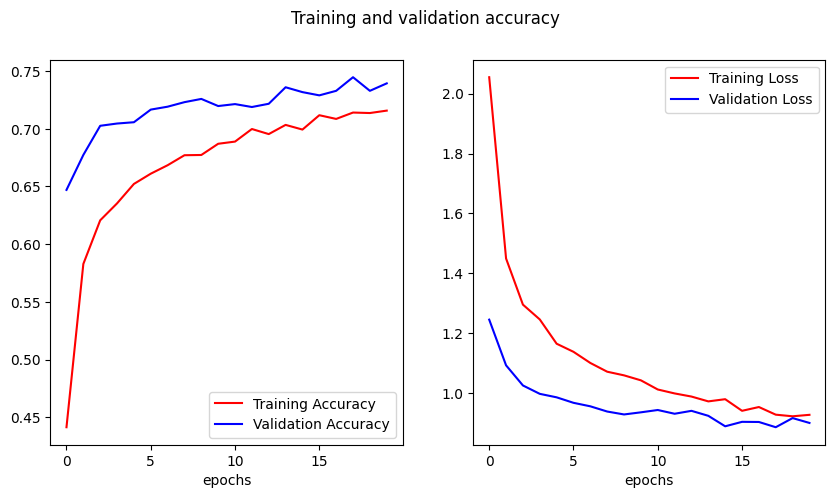

In [36]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()